In [6]:
import numpy as np
from numpy.random import rand, randn
import matplotlib.pyplot as mpl

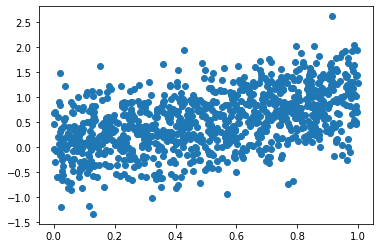

In [7]:
n = 1000
x = rand(n)
eps = 0.5 * randn(n)
y = x + eps
p = np.argsort(x)
x, y = x[p], y[p]
fig, ax = mpl.subplots()
ax.scatter(x, y)

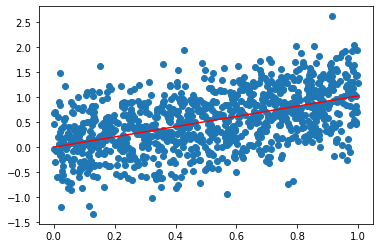

In [8]:
def f(a): return sum((x*a - y)**2)
def Df(a): return sum(2*x * (x*a - y))
DDf = sum(2 * x**2)

a, h = 0.5, 0.0
f_new, f_old = f(a), np.inf
while f_old - f_new > np.sqrt(np.finfo(float).eps):
    h = - Df(a)/DDf
    a += h
    f_old = f_new
    f_new = f(a)

y = a * x
ax.plot(x, y, color='r')
fig

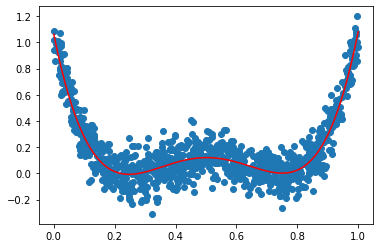

In [9]:
from numpy.linalg import solve
d = 4
eps = 0.1 * randn(n)
y = 30 * (x - .25)**2 * (x - .75)**2 + eps
fig, ax = mpl.subplots()
ax.scatter(x, y)

X = np.array([x**m for m in range(d+1)]).T
a = solve(X.T @ X, X.T @ y)
def interpolate(x): return sum(a[i] * x**i for i in range(d+1))
interpolate = np.vectorize(interpolate)

y = interpolate(x)
ax.plot(x, y, color='r')